# Capstone Project 24.1: Final Report

**Overview**: In this module, we will work

**Author:** Arturo Noguera

**Executive Summary:** Out there every customer has plenty of options for every aquisition , we need to streght our customer´s satisfaction and loyalty. At the same time we need to reduce the probability that competitors can take over our clients. Using Data Driven go to Market strategy, we will create product bundles with more attractive prices and promote synergy among different product business units to reduce production and marketing costs.

**Rationale:** Our approach to this challengue is get to know each customer´s "buying profile"  and target specific customers with higher probability to buy bundles from a broader portfolio vs individual products.

**Research Question:** Predict which customers have more probability to buy items from any category belonging to Product_Line_1 , given that they bought items from any category belonging to Product_Line_2.

**Data Sources:** 

Sales orders received by a large IT corporation from customers located in multiple regions adquiring products from Product_Line_1 and Product_Line_2.

Each product line includes Hardware and Software, has several sublines and each subline includes multiple SKUs. 

Customer is profield based in their Market Segment, Vertical Market, and Geographical region

This Dataset includes the net price for each individual transaction, during a full calendar year.

**Methodology**:Use cleaning and  feature engineering techniques along with multiple visualizations tools to define which parts of the received information is relevant to use it in the modeling stage.

### Import inital libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.metrics import balanced_accuracy_score


### Read in inital sales data 

In [2]:
df = pd.read_csv('./Data/Bookings_24_25_v2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76423 entries, 0 to 76422
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Line     76423 non-null  object 
 1   Product_Subline  76423 non-null  object 
 2   SKU              76423 non-null  object 
 3   Product_Class    76423 non-null  object 
 4   Market_Segment   76423 non-null  object 
 5   Vertical_Market  76423 non-null  object 
 6   Region           76423 non-null  object 
 7   Net_Price        76423 non-null  float64
 8   Customer_Hash    76423 non-null  object 
dtypes: float64(1), object(8)
memory usage: 5.2+ MB


### Customer´s identity was obfuscated to keep privacy

In [4]:
def sha256_hash(s: str):
    return hashlib.sha256(s.encode('utf-8')).hexdigest() 
#df['Customer_Hash'] = df[df['Customer'].notnull()]['Customer'].astype(str).apply(sha256_hash)
#df['Customer_Hash'].value_counts().head(20)
#df.drop(columns=['Customer'], inplace=True)


In [5]:
#df.Customer_Hash
df['Customer_Hash'].head()


0    f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1    f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2    bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3    cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4    1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...
Name: Customer_Hash, dtype: object

### Sales Figures were scaled with a logarithmic transformation and encoded to keep the orignal sign

In [6]:
df.describe()

,Net_Price
count,76423.000
mean,2.169
std,12.626
min,-3249.196
25%,1.412
50%,3.229
75%,4.066
max,7.767


### Explore the data

**-From the Dataframe info, we can tell that there is no missing observations, However we find several "unknown" entries that we will review later**

In [7]:
df.head(20)

,Product_Line,Product_Subline,SKU,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Education-Public_Private,GEO_1,2.107,f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Transportation,GEO_1,3.261,f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,3.566,bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Manufacturing,GEO_2,3.575,cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4,Product_Line_1,Product_Subline_1,SKU_1,Software,ENTERPRISE,Manufacturing,GEO_2,5.081,1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...
5,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Technical_Services,GEO_2,2.175,babe1056a867b55164db3b0d22b9ca744fed10a53008a6...
6,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Technical_Services,GEO_2,0.524,dd6c7c1ad67c9abeca6af6533bf4085222ccea41af7553...
7,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,4.338,57610d619a520d17f15dceff0e63f30b092ce62af54689...
8,Product_Line_1,Product_Subline_1,SKU_1,Software,SERVICE PROVIDER,Technical_Services,GEO_2,0.834,987ae02ba862ce3e3c36a819604d753d5f43d3087c6c0c...
9,Product_Line_1,Product_Subline_1,SKU_1,Software,SMB,Technical_Services,GEO_2,1.707,17b5c026348b14cabbbfe207b13529387deb278111b01c...


In [8]:
#number of unique values in each column
df.nunique()

Product_Line           2
Product_Subline        5
SKU                  130
Product_Class          2
Market_Segment         6
Vertical_Market       14
Region                 3
Net_Price          60342
Customer_Hash      18484
dtype: int64

In [9]:
#look at value counts for Product_Line
df["Product_Line"].value_counts()

Product_Line
Product_Line_1    59232
Product_Line_2    17191
Name: count, dtype: int64

In [10]:
#look at value counts for Product_Subline
df["Product_Subline"].value_counts()

Product_Subline
Product_Subline_1    19738
Product_Subline_5    19364
Product_Subline_2    17191
Product_Subline_4    10236
Product_Subline_3     9894
Name: count, dtype: int64

In [11]:
#look at value counts for SKU
df['SKU'].value_counts().head(10)

SKU
SKU_3      14543
SKU_4       6786
SKU_1       4619
SKU_9       3936
SKU_15      3427
SKU_30      2749
SKU_28      2724
SKU_29      2712
SKU_2       2581
SKU_15P     2501
Name: count, dtype: int64

In [12]:
#look at value counts for Product_Class
df['Product_Class'].value_counts()

Product_Class
Software    64246
Hardware    12177
Name: count, dtype: int64

In [13]:
#look at value counts for Customer Market_Segment
df["Market_Segment"].value_counts()

Market_Segment
COMMERCIAL          23917
SMB                 23163
PUBLIC SECTOR       15197
ENTERPRISE           7962
SERVICE PROVIDER     3361
OTHER                2823
Name: count, dtype: int64

In [14]:
#look at value counts for Customer Vertical_Market
df["Vertical_Market"].value_counts()

Vertical_Market
Professional_Services         11949
Financial_Services            10355
Manufacturing                  9728
Government                     8421
Technical_Services             6360
Retail                         5464
Education-Public_Private       4922
WholeSale-Distribution         4357
Health_Care                    4108
Service_Provider               2889
Media-Entertainment            2520
Transportation                 2284
Energy_Utilities               2259
Hospitality-Hotels_Leisure      807
Name: count, dtype: int64

In [15]:
#look at value counts for Customer geography
df["Region"].value_counts()

Region
GEO_2    43812
GEO_1    21772
GEO_3    10839
Name: count, dtype: int64

In [16]:
#look at Net  Prices Stats
df['Net_Price'].describe()

count   76423.000
mean        2.169
std        12.626
min     -3249.196
25%         1.412
50%         3.229
75%         4.066
max         7.767
Name: Net_Price, dtype: float64

In [17]:
(df['Net_Price'] <=0).sum()

16941

In [18]:
#Before starting the Visualization section, we researched about the negative or Zero Net_Price
#Negative Prices are related to debookings or 'Product Returns'  by unsatisfied Customers
#Zero Net Prices are propomotions or 'gifts' to special customers
#We will get rid off these observations before any Data Evaluation and ignore its efect on the business objective.
df=df.drop(df[df['Net_Price']<=0].index)

In [19]:
(df['Net_Price'] <=0).sum()

0

In [20]:
# Look for 'unknown' Customers and Total Unique Customers
(df['Customer_Hash']=='UNKNOWN').sum()
df['Customer_Hash'].nunique()

862

16146

### Visualizations from received Data

In [21]:
PL_counts=df['Product_Line'].value_counts().to_numpy()
PL_labels=df['Product_Line'].value_counts().index.to_numpy()

PS_counts=df['Product_Subline'].value_counts().to_numpy()
PS_labels=df['Product_Subline'].value_counts().index.to_numpy()


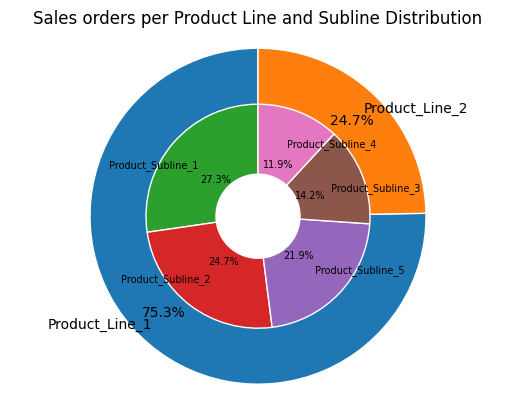

In [22]:
fig, ax = plt.subplots()
plt.title('Sales orders per Product Line and Subline Distribution')
ax.pie(PL_counts, labels=PL_labels, labeldistance=0.9, autopct='%1.1f%%', pctdistance=0.8, startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, radius=1.2)
ax.pie(PS_counts, labels=PS_labels, labeldistance=0.7,autopct='%1.1f%%',pctdistance=0.5, startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'fontsize': 7},radius=0.8)
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig.gca().add_artist(center_circle)
ax.axis('equal') 
plt.show();

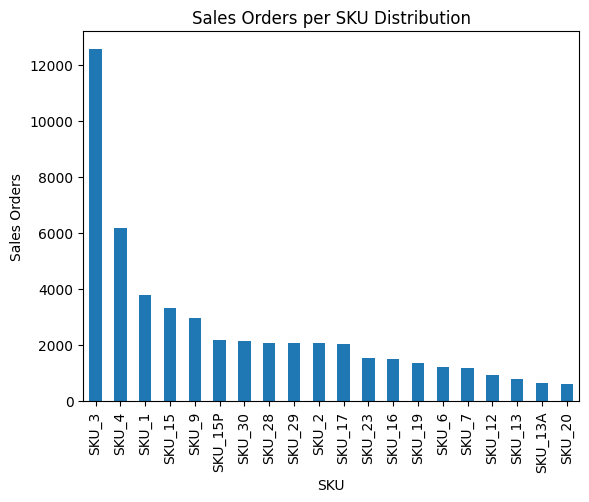

In [23]:
 #Sales Orders per SKU Distribution 

fig=df['SKU'].value_counts().head(20).plot(kind='bar')
fig.set_xlabel('SKU')
fig.set_ylabel('Sales Orders')
fig.set_title('Sales Orders per SKU Distribution');


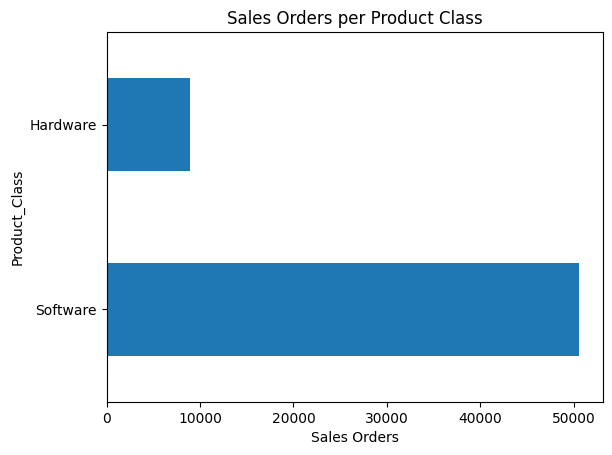

In [24]:
fig=df['Product_Class'].value_counts().plot(kind='barh',rot=0)
fig.set_xlabel('Sales Orders')
fig.set_ylabel('Product_Class')
fig.set_title('Sales Orders per Product Class');

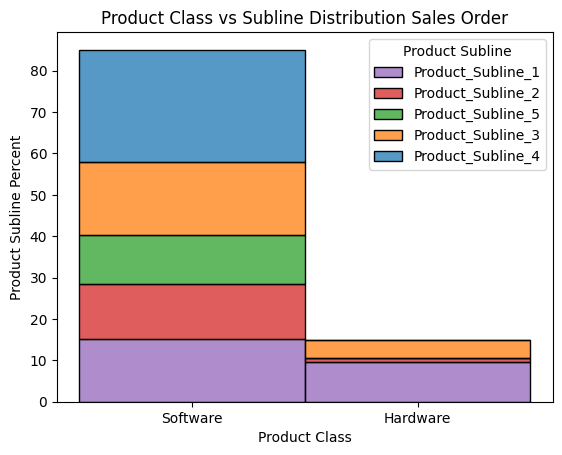

In [25]:
fig = sns.histplot(df, x='Product_Class', hue='Product_Subline',stat='percent',multiple='stack')
fig.set_xlabel('Product Class')
fig.set_ylabel('Product Subline Percent')
fig.legend(title='Product Subline',labels=PS_labels)
fig.set_title('Product Class vs Subline Distribution Sales Order');


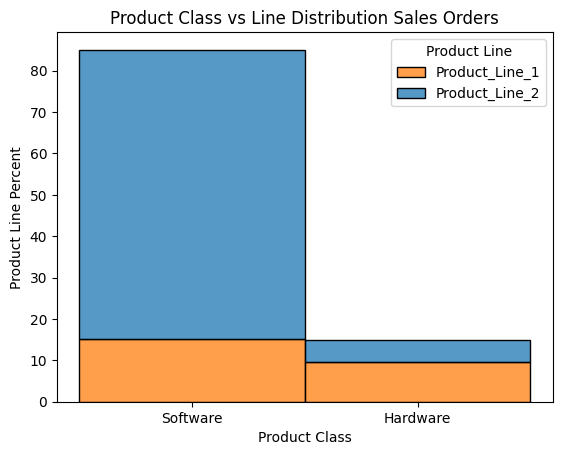

In [26]:
fig = sns.histplot(df, x='Product_Class', hue='Product_Line',stat='percent',multiple='stack')
fig.set_xlabel('Product Class')
fig.set_ylabel('Product Line Percent')
fig.legend(title='Product Line',labels=PL_labels)
fig.set_title('Product Class vs Line Distribution Sales Orders');


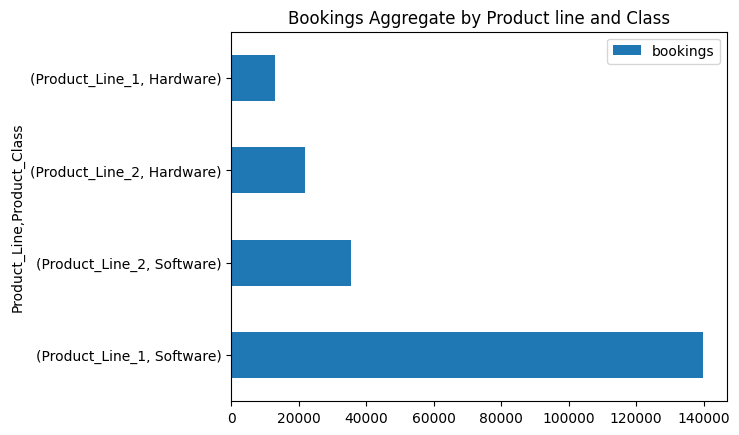

In [27]:
#get bar chart of bookings by product line and Class 
df.groupby(['Product_Line','Product_Class']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='barh',title='Bookings Aggregate by Product line and Class');

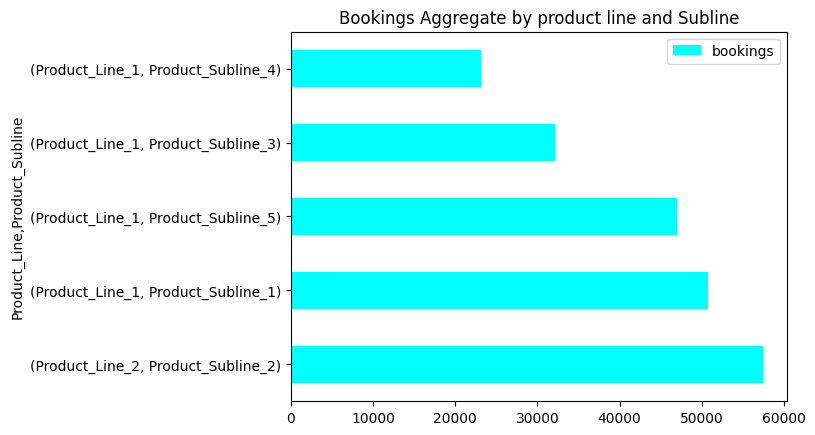

In [28]:
#get bar chart of bookings by Product Line and Subline
df.groupby(['Product_Line','Product_Subline']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='barh',colormap="cool",title='Bookings Aggregate by product line and Subline');

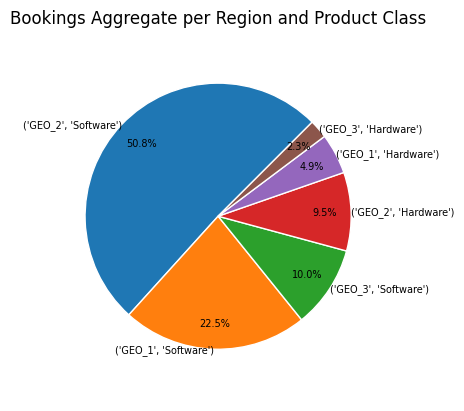

In [29]:
#get pie chart of bookings by Region and Product Class

df_group=df.groupby(['Region','Product_Class']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20)

PL_labels=df_group.index
PL_counts=df_group['bookings'].to_numpy()
fig, ax = plt.subplots()

plt.title('Bookings Aggregate per Region and Product Class')
ax.pie(PL_counts, labels=PL_labels, labeldistance=1.0, autopct='%1.1f%%', pctdistance=0.8, startangle=45,wedgeprops={'linewidth': 1, 'edgecolor': 'white'},textprops={'fontsize': 7}, radius=0.9);


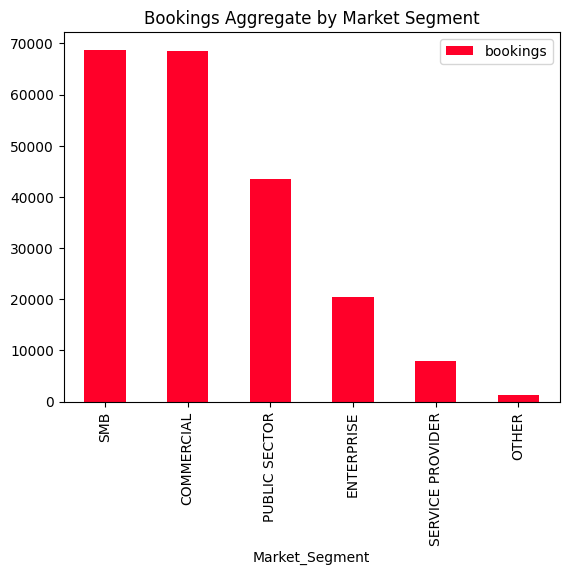

In [30]:
df.groupby(['Market_Segment']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=False).head(20).plot(kind='bar',colormap="gist_rainbow",title='Bookings Aggregate by Market Segment');

<Axes: title={'center': 'Bookings Aggregate by Vertical Market'}, ylabel='Vertical_Market'>

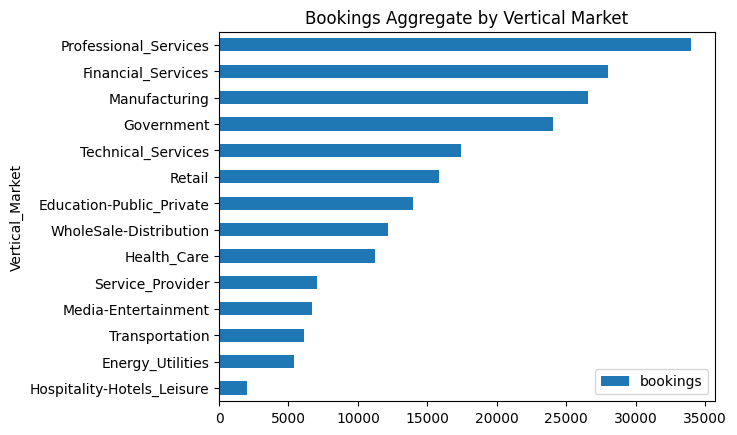

In [31]:
df.groupby(['Vertical_Market']).agg(
     bookings = ('Net_Price','sum'),
     ).sort_values(by="bookings", axis=0, ascending=True).head(30).plot(kind='barh', title='Bookings Aggregate by Vertical Market')

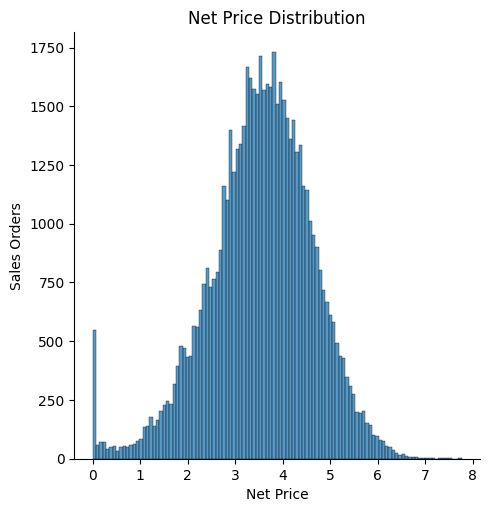

In [32]:
sns.displot(df['Net_Price']).set(title='Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

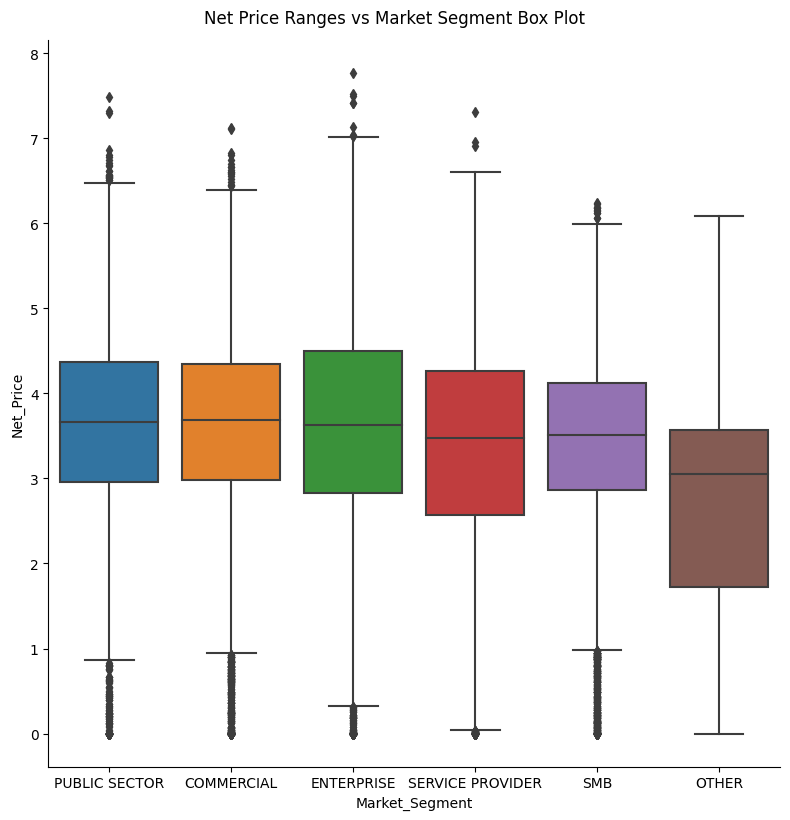

In [33]:
#box plot to see distribution of booking per region
sns.catplot(data=df, kind='box', x='Market_Segment', y='Net_Price', height=8)
plt.suptitle('Net Price Ranges vs Market Segment Box Plot', y=1.02);

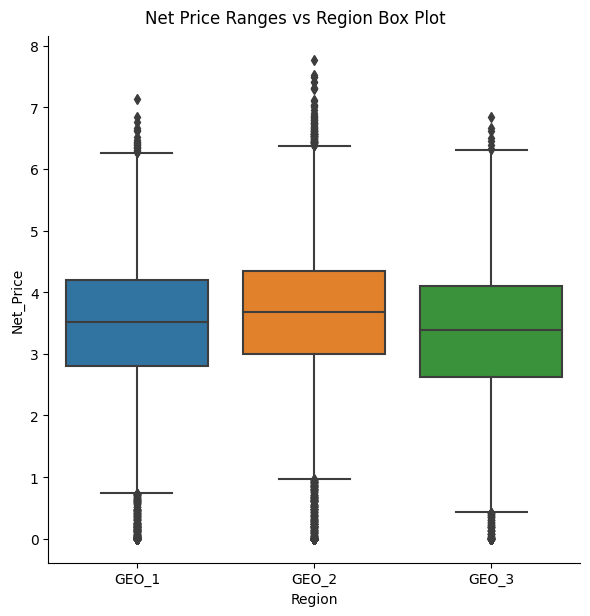

In [34]:
#box plot to see distribution of booking per region
sns.catplot(data=df, kind='box', x='Region', y='Net_Price', height=6)
plt.suptitle('Net Price Ranges vs Region Box Plot', y=1.02);

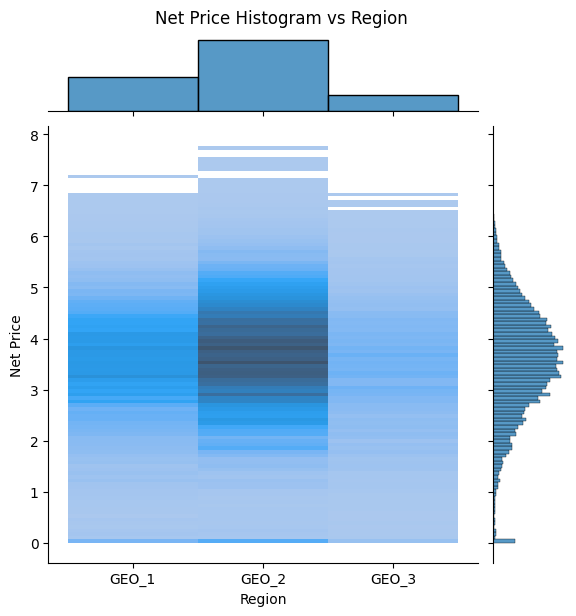

In [35]:
fig = sns.jointplot(df[['Region','Net_Price']], x='Region', y='Net_Price', kind='hist')
fig.set_axis_labels('Region','Net Price')
plt.suptitle('Net Price Histogram vs Region', y=1.02);

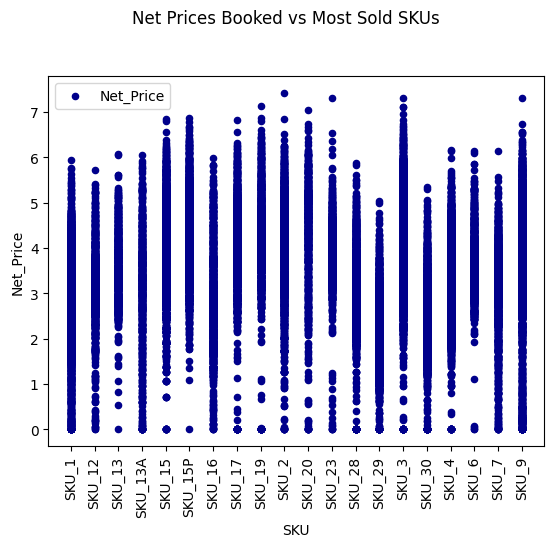

In [36]:
Best_SKUs=df['SKU'].value_counts().head(20).index.to_list()
df_query = df.query('SKU ==@Best_SKUs')

ax = df_query.plot.scatter(x="SKU", y="Net_Price", color="DarkBlue", label="Net_Price",rot=90)
plt.suptitle('Net Prices Booked vs Most Sold SKUs ', y=1.02);


### Data Cleaning and Preparation

In [37]:
#start to drop the rows with negative and zero bookings
#we did this step ahead to avoid the impact of negative numbers in the visualization phase.

#df=df.drop(df[df['Net_Price']<=0].index)

In [38]:
# Review our base line again
df.head()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.info()

,Product_Line,Product_Subline,SKU,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Education-Public_Private,GEO_1,2.107,f0d8152cf299f68973d14ad7f0847bc163550619e6c5db...
1,Product_Line_1,Product_Subline_1,SKU_1,Software,PUBLIC SECTOR,Transportation,GEO_1,3.261,f23c02ca858a0fd43e399f7e63f7b50309964b4fb0c1ea...
2,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Retail,GEO_2,3.566,bcef679da48c3e300b290412ea4d4056f34a35c140e06b...
3,Product_Line_1,Product_Subline_1,SKU_1,Software,COMMERCIAL,Manufacturing,GEO_2,3.575,cad2af5704bc21e50ed0f59d4c2b6c937ff01de6b363a2...
4,Product_Line_1,Product_Subline_1,SKU_1,Software,ENTERPRISE,Manufacturing,GEO_2,5.081,1717dd7b6a0126b8073f75f5265b9c25aa121f8537a706...


<class 'pandas.core.frame.DataFrame'>
Index: 59482 entries, 0 to 76420
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Line     59482 non-null  object 
 1   Product_Subline  59482 non-null  object 
 2   SKU              59482 non-null  object 
 3   Product_Class    59482 non-null  object 
 4   Market_Segment   59482 non-null  object 
 5   Vertical_Market  59482 non-null  object 
 6   Region           59482 non-null  object 
 7   Net_Price        59482 non-null  float64
 8   Customer_Hash    59482 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.5+ MB


In [39]:
#removing SKU from the data since there are 140 different products in our portfolio and only a few of them have significative count.
df = df.drop(['SKU'],axis=1)

In [40]:
#Customer ID is unique for each customer and is not relevant for the business purpose, however we can not drop it by now, 
#as it will be used to reorganize our data corpus.

#However it is safe to delete 'UNKNOWN' now, because these will converge in a single "customer" when we consolidate Sales Orders per customer

Unk_index = df[ (df['Customer_Hash'] == 'UNKNOWN')].index
df.drop(Unk_index , inplace=True)

In [41]:
#look for null values in bookings column
pd.isna(df["Net_Price"]).value_counts()

Net_Price
False    58620
Name: count, dtype: int64

In [42]:
#Remember this feature was scaled using a Logarithmic transformer before having access to the raw Data and we have removed Net Prices <=0
df['Net_Price'].describe()
(df['Net_Price']).round(0).value_counts()

count   58620.000
mean        3.557
std         1.083
min         0.000
25%         2.918
50%         3.607
75%         4.282
max         7.767
Name: Net_Price, dtype: float64

Net_Price
4.000    21090
3.000    17911
5.000     9143
2.000     6759
6.000     1516
1.000     1335
0.000      788
7.000       76
8.000        2
Name: count, dtype: int64

In [43]:
#look at distribution of bookings by business sub entity
df.groupby('Product_Subline').agg({'Net_Price': ['mean', 'min', 'max']})
df.groupby('Market_Segment').agg({'Net_Price': ['mean', 'min', 'max']})

Net_Price            
                       mean   min   max
Product_Subline                        
Product_Subline_1     3.128 0.000 7.415
Product_Subline_2     3.913 0.000 7.300
Product_Subline_3     3.807 0.000 7.523
Product_Subline_4     3.289 0.000 7.492
Product_Subline_5     3.678 0.000 7.767

Net_Price            
                      mean   min   max
Market_Segment                        
COMMERCIAL           3.634 0.000 7.121
ENTERPRISE           3.615 0.000 7.767
OTHER                2.869 0.000 5.320
PUBLIC SECTOR        3.634 0.000 7.486
SERVICE PROVIDER     3.375 0.000 6.954
SMB                  3.455 0.000 6.234

**All Sales Orders seem to be smothly distributem among Product_sublines and Market Segments**

In [44]:
df.groupby('Product_Line').count().reset_index()

,Product_Line,Product_Subline,Product_Class,Market_Segment,Vertical_Market,Region,Net_Price,Customer_Hash
0,Product_Line_1,44018,44018,44018,44018,44018,44018,44018
1,Product_Line_2,14602,14602,14602,14602,14602,14602,14602


In [45]:
#Let us focus in Sales Order from "Product Line 2"
df.query('Product_Line=="Product_Line_2"')['Product_Subline'].value_counts()
#All these Sales orders belong to a single Subline "Product_Subline_2"
#so we can find all Customers buying "Product Line 2" filtering by "Product_Subline_2"

Product_Subline
Product_Subline_2    14602
Name: count, dtype: int64

In [46]:
#Look at Stats from Product_Subline_2
df.query('Product_Subline=="Product_Subline_2"').describe()

,Net_Price
count,14602.000
mean,3.913
std,0.764
min,0.000
25%,3.378
50%,3.876
75%,4.406
max,7.300


All Customers buying "Product Line 1", are distributed between "Product_Sublines" 1,3,4 and 5, as shown below

In [47]:
df.query('Product_Line=="Product_Line_1"')['Product_Subline'].value_counts()
df.query('Product_Line=="Product_Line_1"').describe()

Product_Subline
Product_Subline_1    16145
Product_Subline_5    12504
Product_Subline_3     8382
Product_Subline_4     6987
Name: count, dtype: int64

,Net_Price
count,44018.000
mean,3.439
std,1.146
min,0.000
25%,2.733
50%,3.483
75%,4.220
max,7.767


In [48]:
df.query('Product_Line=="Product_Line_1"').describe()
df.query('Product_Subline=="Product_Subline_2"').describe()

,Net_Price
count,44018.000
mean,3.439
std,1.146
min,0.000
25%,2.733
50%,3.483
75%,4.220
max,7.767


,Net_Price
count,14602.000
mean,3.913
std,0.764
min,0.000
25%,3.378
50%,3.876
75%,4.406
max,7.300


In [49]:
#new data frame to use to build along with table - did not keep columns that are not needed (Product Classification, Business Sub Entity, Business Entity)
df_new = df.groupby(['Customer_Hash','Market_Segment','Vertical_Market','Region'])['Net_Price'].mean().to_frame().reset_index()
df_new.shape
df_new.info()
df_new['Net_Price'].head()
df_new['Customer_Hash'].value_counts().head()

(19827, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19827 entries, 0 to 19826
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    19827 non-null  object 
 1   Market_Segment   19827 non-null  object 
 2   Vertical_Market  19827 non-null  object 
 3   Region           19827 non-null  object 
 4   Net_Price        19827 non-null  float64
dtypes: float64(1), object(4)
memory usage: 774.6+ KB


0   4.408
1   3.197
2   4.481
3   1.513
4   3.768
Name: Net_Price, dtype: float64

Customer_Hash
23759997b3c59884dc4c0ff5320d6301b0e7f63bf0f6483a7b54d7d43bc5ccd1    141
beca103a13e5a9b8b427ada2a12e5222dc61080d75ec0d995c72efae047c396c     26
dafafcc0517f1b5a45883e29e029288470fe42c5279773e3351c6a50f5ceb888     26
b092e347f8c27e0ecfc19de24f3ed467343cb52e5f3b8adedd8438f892908f4b     25
6c00e1211d667ff27567540e49e592a052a6a829ba673ecce36ae817acf27b4f     25
Name: count, dtype: int64

In [50]:
#We will remove Customers with high numbers of sales orders, because these are most likeky resellers, 
#that buy large amounts of products to sell them to retail customers, and these would introduce noise in the modeling

In [51]:
df_new=df_new.sort_values(by=['Net_Price'],ascending=False ).drop_duplicates(subset=['Customer_Hash'], keep='last')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16145 entries, 14946 to 15002
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    16145 non-null  object 
 1   Market_Segment   16145 non-null  object 
 2   Vertical_Market  16145 non-null  object 
 3   Region           16145 non-null  object 
 4   Net_Price        16145 non-null  float64
dtypes: float64(1), object(4)
memory usage: 756.8+ KB


In [52]:
df_new['Customer_Hash'].value_counts().max()


1

After we aggregated  the mean Net_Price, some Customers with lots of Sales Orders show large Net_Prices, we will now drop the outliers.

In [53]:
(df_new['Net_Price']).round(0).value_counts()

Net_Price
4.000    6256
3.000    5534
5.000    1836
2.000    1691
1.000     349
0.000     272
6.000     202
7.000       5
Name: count, dtype: int64

In [54]:
Q1 = df_new['Net_Price'].quantile(0.25)
Q3 = df_new['Net_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df_new.query('(Net_Price >= @lower_limit) & (Net_Price <= @upper_limit)')
df_clean.describe()
(df_clean['Net_Price']).round(0).value_counts()

,Net_Price
count,15630.000
mean,3.526
std,0.859
min,1.157
25%,2.971
50%,3.555
75%,4.104
max,5.850


Net_Price
4.000    6256
3.000    5534
5.000    1836
2.000    1691
1.000     189
6.000     124
Name: count, dtype: int64

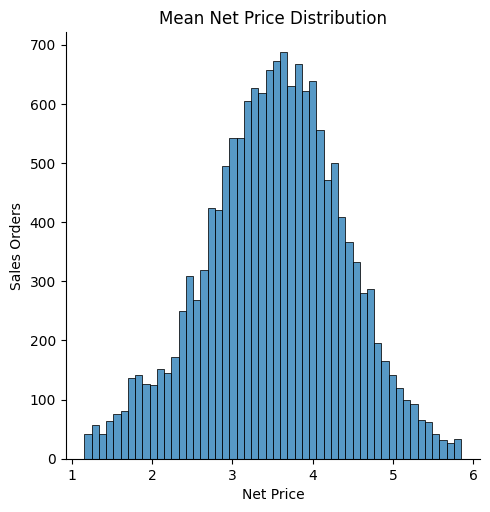

In [55]:
sns.displot(df_clean['Net_Price']).set(title='Mean Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15630 entries, 18591 to 19369
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_Hash    15630 non-null  object 
 1   Market_Segment   15630 non-null  object 
 2   Vertical_Market  15630 non-null  object 
 3   Region           15630 non-null  object 
 4   Net_Price        15630 non-null  float64
dtypes: float64(1), object(4)
memory usage: 732.7+ KB


**Build pivot table to combine by customer so we can get our target variable (customers that buy Subline1 and one Subline2 products)**

In [57]:
#going to use business sub entity to derive target variable
table = pd.pivot_table(df, values='Net_Price', index=['Customer_Hash'],
                      columns=['Product_Subline'], aggfunc="mean")

In [58]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16145 entries, 000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301 to fffe40b62cee28596d1051876cc4eebf74571235ef02eae5f02b799d5c138b26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Subline_1  8613 non-null   float64
 1   Product_Subline_2  6451 non-null   float64
 2   Product_Subline_3  5431 non-null   float64
 3   Product_Subline_4  3602 non-null   float64
 4   Product_Subline_5  5325 non-null   float64
dtypes: float64(5)
memory usage: 756.8+ KB


In [59]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5
Customer_Hash,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN


In [60]:
#add new column to test if customer buys Product_Line_2  0= no, 1 = yes
table['buys_PL2']=0

In [61]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2
Customer_Hash,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,0


In [62]:
#check to see if Customer bought SubLine2 Product
table.loc[(table['Product_Subline_2']>0),'buys_PL2']=1
table['buys_PL2'].value_counts()

buys_PL2
0    9694
1    6451
Name: count, dtype: int64

In [63]:
#add new column to test if customer buys security 0= no, 1 = yes
table['buys_PL1']=0

In [64]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1
Customer_Hash,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,0


In [65]:
#See if customer buys any subline of Product_Line_1 = no, 1 = yes
table.loc[(table['Product_Subline_1']>0) |
(table['Product_Subline_3']>0) |
(table['Product_Subline_4']>0) |
(table['Product_Subline_5']>0),
'buys_PL1']=1
table['buys_PL1'].value_counts()

buys_PL1
1    15467
0      678
Name: count, dtype: int64

In [66]:
#check to see if previous from cell worked
table.head(10)

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1
Customer_Hash,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,1
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,1
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,1
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,1
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,1
00107cbf04f82fcab09b9fc1f58932b20ac2ed19b529ba2cbc4a4ffabb1ad108,2.307,3.206,NaN,NaN,NaN,1,1
0016e8a1828315f9e566876282f0f9560728a2a59594476132b8017f8901d622,NaN,NaN,3.962,NaN,NaN,0,1
001cddca80f747fe6b9007dbe69e1c63eaf45474fef74ae60147806e71ad1556,2.588,3.558,4.298,NaN,NaN,1,1
002666402e595599503d79341f490ccbc49bb4f5e77eada3d45d4bc00fd41a14,NaN,5.215,NaN,NaN,NaN,1,0


In [67]:
#Look at customers that buy Products from Line1 and Line2 
#create new a column that checks for customers that buy both , encoding:  1 = customer buy both Lines, 0= buy only Line1 or Line 2
table['buys_both'] = 0

In [68]:
table.head()

Product_Subline,Product_Subline_1,Product_Subline_2,Product_Subline_3,Product_Subline_4,Product_Subline_5,buys_PL2,buys_PL1,buys_both
Customer_Hash,,,,,,,,
000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301,NaN,NaN,NaN,4.408,NaN,0,1,0
0005e7feb93c679c28814eacda65f194a5f0d949c0374b0d4bda8d7ceecdcbae,2.317,3.360,3.750,NaN,NaN,1,1,0
000637d7e3c727be6490413f3a28e857d16f54be469fcac56a80879a75dbe74d,4.481,NaN,NaN,NaN,NaN,0,1,0
00083d3d1c01000088b30d1ae5d912c2c8bc83ca74b0ef5b31043ba7db7ddabb,1.513,NaN,NaN,NaN,NaN,0,1,0
000cd92bf5b7d818165970b409aa183ebeb1d0270c871519324cc37a4dd96dc3,3.289,4.247,NaN,NaN,NaN,1,1,0


In [69]:
#populate column for buys both
table.loc[(table['buys_PL2']>0) &
(table['buys_PL1']>0), 
'buys_both']=1

In [70]:
table['buys_both'].value_counts(normalize=True)

buys_both
0   0.642
1   0.358
Name: proportion, dtype: float64

In [71]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16145 entries, 000128276c19c8d7dbac91ad5bf54639f1d3e8f308f89f9b3c58852914733301 to fffe40b62cee28596d1051876cc4eebf74571235ef02eae5f02b799d5c138b26
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Subline_1  8613 non-null   float64
 1   Product_Subline_2  6451 non-null   float64
 2   Product_Subline_3  5431 non-null   float64
 3   Product_Subline_4  3602 non-null   float64
 4   Product_Subline_5  5325 non-null   float64
 5   buys_PL2           16145 non-null  int64  
 6   buys_PL1           16145 non-null  int64  
 7   buys_both          16145 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.6+ MB


In [72]:
#The difference between these observations count  in the Pivot Table vs the Data Frame denote errors in the Customer labeling, 
#typicaly a single customer show belong to single Region, Market Segment and Vertical Market

Merge the Pivot Table and the Data Frame to consolidate all the Customer Profile and its associated Products.

In [73]:
#merge table and data frame on customer column 
df_merge = pd.merge(df_clean, table.loc[:, ['buys_both']], on='Customer_Hash')

In [74]:
df_merge.shape
df_merge.head(10)

(15630, 6)

,Customer_Hash,Market_Segment,Vertical_Market,Region,Net_Price,buys_both
0,efb935165fc46f423333ae2870618f556342abd88177f9...,COMMERCIAL,Professional_Services,GEO_1,5.850,1
1,8d129893930060bef20fadbb329da0897450543127a951...,PUBLIC SECTOR,Government,GEO_1,5.847,0
2,d6f10455bddf55b3729d28af1aa68ac0b410fcb553c315...,ENTERPRISE,Government,GEO_1,5.846,0
3,4091eb3af1c5a7133af357ec2cad02f303e22330481a65...,PUBLIC SECTOR,Financial_Services,GEO_1,5.842,1
4,82a31080419aa3bab339cc7a0f49af038e1c5e151d541b...,ENTERPRISE,Professional_Services,GEO_1,5.841,0
5,ad8942229c32e8b4fd8c05e7fcbd129b9e558a0acbec48...,PUBLIC SECTOR,Education-Public_Private,GEO_2,5.839,0
6,3a2c7bd9abf2cf37080e945b7a9071542249cf0e09b81a...,PUBLIC SECTOR,Education-Public_Private,GEO_2,5.830,0
7,19d0c1b645c00839906cb12357114ca2e8813e6b1efce6...,PUBLIC SECTOR,Government,GEO_2,5.828,0
8,13f0d44a584db3ee84955df57f0fcdf991801283004fac...,PUBLIC SECTOR,Health_Care,GEO_1,5.825,0
9,59b40cd31419f9ad685934315828c59af6ff790fd3738e...,COMMERCIAL,Professional_Services,GEO_1,5.823,1


In [75]:
#Now it is safe to get rid off the Customer_Hash Column as it is irrelevant for the modeling phase

df_final = df_merge.drop(['Customer_Hash'],axis=1)

## Data Exploration and Cleaning Results
After  parsing, enconding, obfuscating, cleaning ,removing incesary info, removing outliers, consolidating, reordering, and managing inbalance, we have a Data Set that is ready for the modeling phase.
The final Data set "Bookings_for_Modeling.csv" is included in this repository.

In [76]:
#look at new dataframe
df_final.info()
df_final.to_csv('./Data/Bookings_for_Modeling.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15630 entries, 0 to 15629
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market_Segment   15630 non-null  object 
 1   Vertical_Market  15630 non-null  object 
 2   Region           15630 non-null  object 
 3   Net_Price        15630 non-null  float64
 4   buys_both        15630 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 610.7+ KB


In [77]:
#another summary
df_final.describe()

,Net_Price,buys_both
count,15630.000,15630.000
mean,3.526,0.366
std,0.859,0.482
min,1.157,0.000
25%,2.971,0.000
50%,3.555,0.000
75%,4.104,1.000
max,5.850,1.000


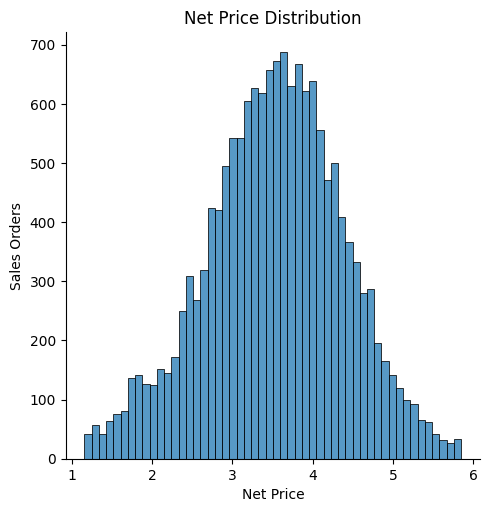

In [78]:
sns.displot(df_final['Net_Price']).set(title='Net Price Distribution', xlabel='Net Price', ylabel='Sales Orders');

In [79]:
df_final['buys_both'].value_counts(normalize=False)
df_final['buys_both'].value_counts(normalize=True)

buys_both
0    9914
1    5716
Name: count, dtype: int64

buys_both
0   0.634
1   0.366
Name: proportion, dtype: float64

In [80]:
df_final.describe()

,Net_Price,buys_both
count,15630.000,15630.000
mean,3.526,0.366
std,0.859,0.482
min,1.157,0.000
25%,2.971,0.000
50%,3.555,0.000
75%,4.104,1.000
max,5.850,1.000


## Initial Data Modeling

Once we have cleaned the initial DataSet we will preprocess it and sample it to use only 500 random records for the modeling phase
We will create 4 simple base models using Logistic Regression, KNN, Desition Threes and SVM; w

In [81]:
df_sample = df_final.sample(n=500,random_state=142)
#df_sample = df_final

In [82]:

num_features = ['Net_Price']
ohe_features = ['Market_Segment','Vertical_Market','Region']

FeatureEngineering = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ohe_features),
    (StandardScaler(), num_features),
    remainder="passthrough",
    verbose_feature_names_out=False,
)
FeatureEngineering

df_trans = pd.DataFrame(FeatureEngineering.fit_transform(df_sample),columns=FeatureEngineering.get_feature_names_out())
df_trans.info()
df_trans.head()


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 ['Market_Segment', 'Vertical_Market',
                                  'Region']),
                                ('standardscaler', StandardScaler(),
                                 ['Net_Price'])],
                  verbose_feature_names_out=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Market_Segment_COMMERCIAL                   500 non-null    float64
 1   Market_Segment_ENTERPRISE                   500 non-null    float64
 2   Market_Segment_OTHER                        500 non-null    float64
 3   Market_Segment_PUBLIC SECTOR                500 non-null    float64
 4   Market_Segment_SERVICE PROVIDER             500 non-null    float64
 5   Market_Segment_SMB                          500 non-null    float64
 6   Vertical_Market_Education-Public_Private    500 non-null    float64
 7   Vertical_Market_Energy_Utilities            500 non-null    float64
 8   Vertical_Market_Financial_Services          500 non-null    float64
 9   Vertical_Market_Government                  500 non-null    float64
 10  Vertical_Marke

,Market_Segment_COMMERCIAL,Market_Segment_ENTERPRISE,Market_Segment_OTHER,Market_Segment_PUBLIC SECTOR,Market_Segment_SERVICE PROVIDER,Market_Segment_SMB,Vertical_Market_Education-Public_Private,Vertical_Market_Energy_Utilities,Vertical_Market_Financial_Services,Vertical_Market_Government,...,Vertical_Market_Retail,Vertical_Market_Service_Provider,Vertical_Market_Technical_Services,Vertical_Market_Transportation,Vertical_Market_WholeSale-Distribution,Region_GEO_1,Region_GEO_2,Region_GEO_3,Net_Price,buys_both
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.752,1.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,-1.126,0.000
2,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.170,0.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.484,0.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.217,1.000


In [83]:
X = df_trans.drop(columns=['buys_both'])
#X = df_trans.drop(columns=['buys_both','Net_Price'])
y = df_trans['buys_both']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142, stratify=y)

**Logistic Regression base model**

In [84]:
logRegMod = LogisticRegression()

logRegMod.fit(X_train,y_train)
logRegAcc_train = logRegMod.score(X_train,y_train)
logRegAcc_train
logRegAcc_test = logRegMod.score(X_test,y_test)
logRegAcc_test

LogisticRegression()

0.6906666666666667

0.672

**K Nearest Neighbors base model**

In [85]:
knnClsMod = KNeighborsClassifier()

In [86]:
%%time
knnClsMod.fit(X_train,y_train)

CPU times: user 4.06 ms, sys: 292 µs, total: 4.35 ms
Wall time: 1.17 ms


KNeighborsClassifier()

In [87]:
knnClsAcc_train = knnClsMod.score(X_train,y_train)
knnClsAcc_train

0.72

In [88]:
knnClsAcc_test = knnClsMod.score(X_test,y_test)
knnClsAcc_test

0.688

**Decision Tree base model**

In [190]:
decTreMod = DecisionTreeClassifier()

In [191]:
%%time
decTreMod.fit(X_train,y_train)

CPU times: user 7.34 ms, sys: 3.9 ms, total: 11.2 ms
Wall time: 11.1 ms


DecisionTreeClassifier()

In [192]:
decTreAcc_train = decTreMod.score(X_train,y_train)
decTreAcc_train

1.0

In [193]:
decTreAcc_test = decTreMod.score(X_test,y_test)
decTreAcc_test

0.592

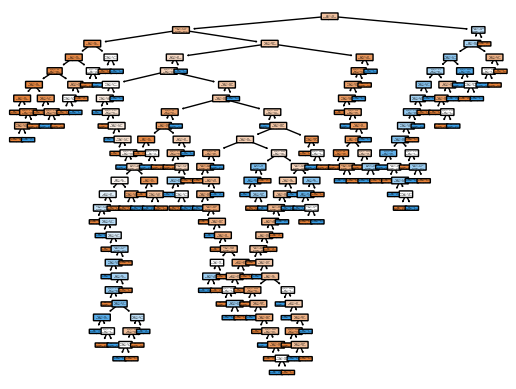

In [195]:
fig = plot_tree(decTreMod, filled=True, proportion=True, rounded=True)

**Support Vector Machine base model**

In [93]:
svmClsMod = SVC(probability=True)

In [94]:
%%time
svmClsMod.fit(X_train,y_train)

CPU times: user 77 ms, sys: 35.1 ms, total: 112 ms
Wall time: 16.6 ms


SVC(probability=True)

In [95]:
svmClsAcc_train = svmClsMod.score(X_train,y_train)
svmClsAcc_train

0.7173333333333334

In [96]:
svmClsAcc_test = svmClsMod.score(X_test,y_test)
svmClsAcc_test

0.712

**Base Model accuracy benchmarking**

In [97]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'Train Time':[0.214,0.283,0.029,4.26],
    'Train Accuracy':[logRegAcc_train,knnClsAcc_train,decTreAcc_train,svmClsAcc_train],
    'Test Accuracy':[logRegAcc_test,knnClsAcc_test,decTreAcc_test,svmClsAcc_test]})\
    .set_index('Model').sort_values(by=['Test Accuracy','Train Time'],ascending=False)
df_Models

,Train Time,Train Accuracy,Test Accuracy
Model,,,
SupportVectorMachine,4.260,0.717,0.712
K-NearestNeighbors,0.283,0.720,0.688
LogisticRegression,0.214,0.691,0.672
DecisionTree,0.029,1.000,0.584


In [98]:
soft_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier()),    ('DTree',DecisionTreeClassifier())], voting = 'soft')
soft_voter.fit(X, y)
soft_accuracy = soft_voter.score(X, y)
soft_accuracy

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('lgr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('DTree', DecisionTreeClassifier())],
                 voting='soft')

0.908

## Base Models Performance Improvement
There has been a significant reduction in features and the fitting times are quite fast already so the current engineered data set will be used for the next phase of hyperparameter tunning
Ultimately the business objective is to determine the best model to use for classification of this particular data hence the priority is to evaluate every model's performance with the same data set
More importantly, accuracy may not be the best metric to use in this case and since there are no serious implications for the customer or the company with false positives or false negatives; given the imbalanced classes for the target variable, it would be best to use F1 scoring

In [99]:
f1_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)

**Logistic Regression GridSearch best hyperparameters**

In [100]:
logRegParams = {'penalty':['l1','l2'],
                'fit_intercept':[False,True],
                'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}

In [101]:
logRegGrd =  GridSearchCV(estimator=logRegMod,
                          param_grid=logRegParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [102]:
%%time
logRegGrd.fit(X_train,y_train)

CPU times: user 925 ms, sys: 912 ms, total: 1.84 s
Wall time: 356 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [False, True],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [103]:
logRegGrd.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

In [104]:
logRegProbs = logRegGrd.best_estimator_.predict_proba(X_test)[:,1]

In [105]:
logRegPreds = logRegGrd.best_estimator_.predict(X_test)

In [106]:
logRegF1 = logRegGrd.best_score_
logRegF1

0.2877577098489912

In [107]:
logRegAcc = accuracy_score(y_test,logRegPreds)
logRegAcc

0.704

In [108]:
logRegPre = precision_score(y_test,logRegPreds, pos_label=1)
logRegPre

0.65

In [109]:
logRegRec = recall_score(y_test, logRegPreds, pos_label=1)
logRegRec

0.3023255813953488

In [110]:
logRegAuc = roc_auc_score(y_test, logRegProbs)
logRegAuc

0.6301758366420874

In [111]:
pd.Series(logRegPreds).value_counts()
y_test.value_counts()

0.000    105
1.000     20
Name: count, dtype: int64

buys_both
0.000    82
1.000    43
Name: count, dtype: int64

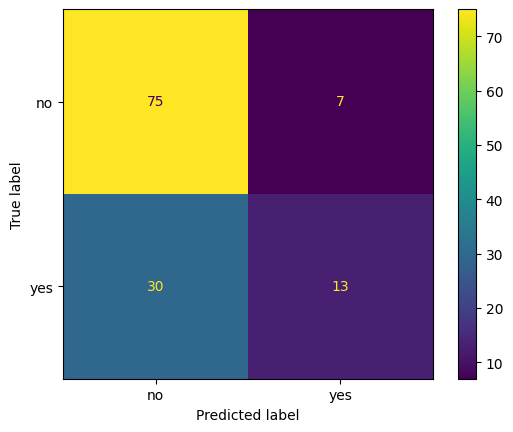

In [112]:
logRegCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,logRegPreds),display_labels=['no','yes'])
logRegCnfMtx.plot()

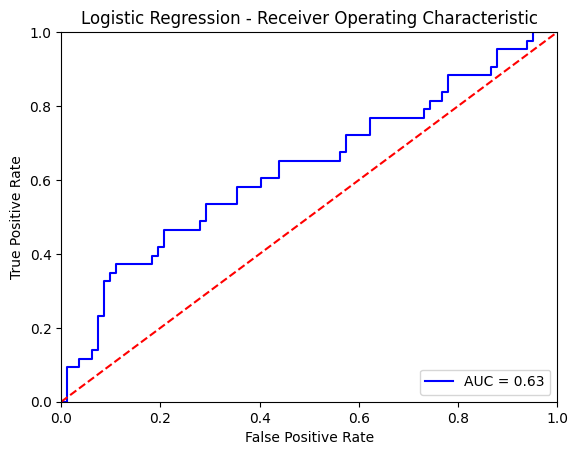

In [113]:
fpr, tpr, threshold = roc_curve(y_test,logRegProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Logistic Regression - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**K Nearest Neighbors best hyperparameters**

In [114]:
knnClsParams = {'n_neighbors':[3,5,10,15]}

In [115]:
knnClsGrd =  GridSearchCV(estimator=knnClsMod,
                          param_grid=knnClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [116]:
%%time
knnClsGrd.fit(X_train,y_train)

CPU times: user 1 s, sys: 858 ms, total: 1.86 s
Wall time: 207 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [117]:
knnClsGrd.best_params_

{'n_neighbors': 3}

In [118]:
knnClsProbs = knnClsGrd.best_estimator_.predict_proba(X_test)[:,1]

In [119]:
knnClsPreds = knnClsGrd.best_estimator_.predict(X_test)

In [120]:
knnClsF1 = knnClsGrd.best_score_
knnClsF1

0.3740378050284387

In [121]:
knnClsAcc = accuracy_score(y_test,knnClsPreds)
knnClsAcc

0.6

In [122]:
knnClsPre = precision_score(y_test,knnClsPreds,pos_label=1)
knnClsPre

0.40540540540540543

In [123]:
knnClsRec = recall_score(y_test,knnClsPreds,pos_label=1)
knnClsRec

0.3488372093023256

In [124]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
knnClsAuc

0.6056437889960296

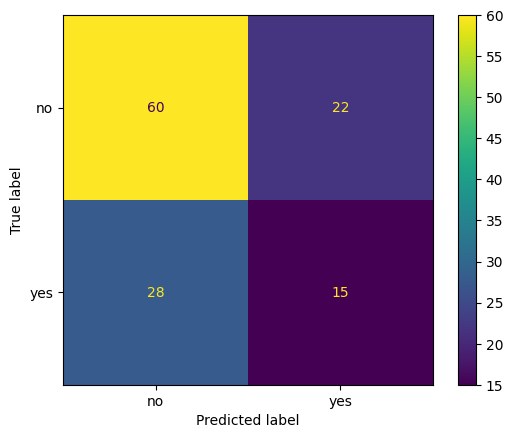

In [125]:
knnClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,knnClsPreds),display_labels=['no','yes'])
knnClsCnfMtx.plot()

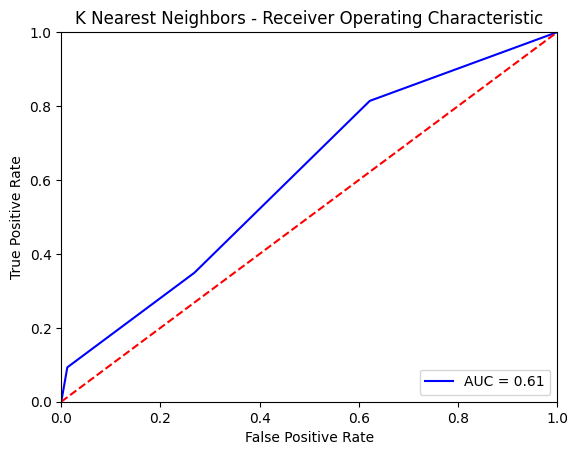

In [126]:
fpr, tpr, threshold = roc_curve(y_test,knnClsProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('K Nearest Neighbors - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Decision Tree best hyperparameters**

In [127]:
decTreParams = {'max_depth':[2,3,5,7,10,15],
                'criterion':['gini','entropy','log_loss'],
                'min_samples_split':[2,4,6,8],
                'min_samples_leaf':[1,2,3,5]}

In [128]:
decTreGrd =  GridSearchCV(estimator=decTreMod,
                          param_grid=decTreParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [129]:
%%time
decTreGrd.fit(X_train,y_train)

CPU times: user 5.34 s, sys: 19.1 ms, total: 5.36 s
Wall time: 5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [130]:
decTreGrd.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [131]:
decTreProbs = decTreGrd.best_estimator_.predict_proba(X_test)[:,1]

In [132]:
decTrePreds = decTreGrd.best_estimator_.predict(X_test)

In [133]:
decTreF1 = decTreGrd.best_score_
decTreF1

0.4384026483479371

In [134]:
decTreAcc = accuracy_score(y_test,decTrePreds)
decTreAcc

0.56

In [135]:
decTrePre = precision_score(y_test,decTrePreds,pos_label=1)
decTrePre

0.3695652173913043

In [136]:
decTreRec = recall_score(y_test,decTrePreds,pos_label=1)
decTreRec

0.3953488372093023

In [137]:
decTreAuc = roc_auc_score(y_test,decTreProbs)
decTreAuc

0.5492058990357346

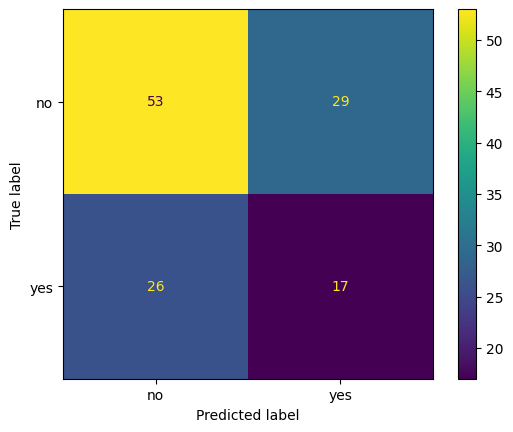

In [138]:
decTreCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,decTrePreds),display_labels=['no','yes'])
decTreCnfMtx.plot()

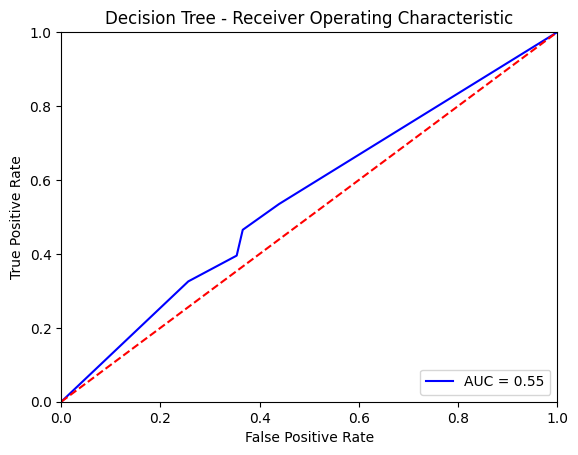

In [139]:
fpr, tpr, threshold = roc_curve(y_test,decTreProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Decision Tree - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

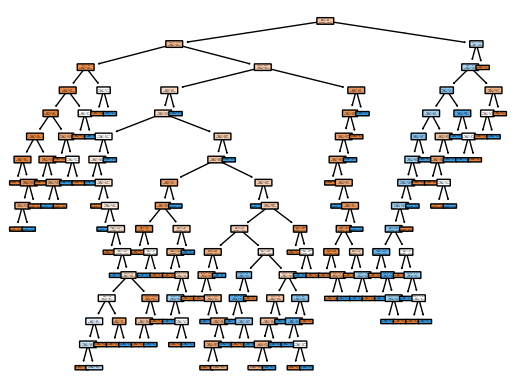

In [140]:
fig = plot_tree(decTreGrd.best_estimator_, filled=True, proportion=True, rounded=True)

In [141]:
### Support Vector Machine best hyperparameter

In [142]:
svmClsParams = {'C':[0.1,1.0,10],
                'kernel':['rbf','linear','poly'],
                'degree':[2,3],
                'gamma':['scale','auto']}

In [143]:
svmClsGrd =  GridSearchCV(estimator=svmClsMod,
                          param_grid=svmClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [144]:
%%time
svmClsGrd.fit(X_train,y_train)

CPU times: user 2.19 s, sys: 7.67 ms, total: 2.2 s
Wall time: 2.2 s


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1.0, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [145]:
svmClsGrd.best_params_

{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [146]:
svmClsMod = SVC(C=10,probability=True).fit(X_train,y_train)

In [147]:
svmClsProbs = svmClsMod.predict_proba(X_test)[:,1]

In [148]:
svmClsPreds = svmClsGrd.best_estimator_.predict(X_test)

In [149]:
svmClsF1 = svmClsGrd.best_score_
svmClsF1

0.3326634768740032

In [150]:
svmClsAcc = accuracy_score(y_test,svmClsPreds)
svmClsAcc

0.704

In [151]:
svmClsPre = precision_score(y_test,svmClsPreds,pos_label=1)
svmClsPre

0.6363636363636364

In [152]:
svmClsRec = recall_score(y_test,svmClsPreds,pos_label=1)
svmClsRec

0.32558139534883723

In [153]:
svmClsAuc = roc_auc_score(y_test,svmClsProbs)
svmClsAuc

0.6471922858763471

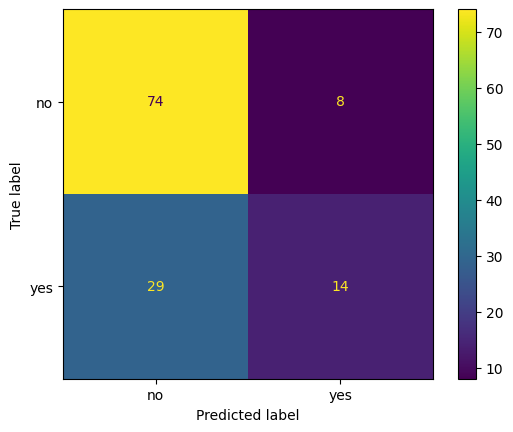

In [154]:
svmClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,svmClsPreds),display_labels=['no','yes'])
svmClsCnfMtx.plot()

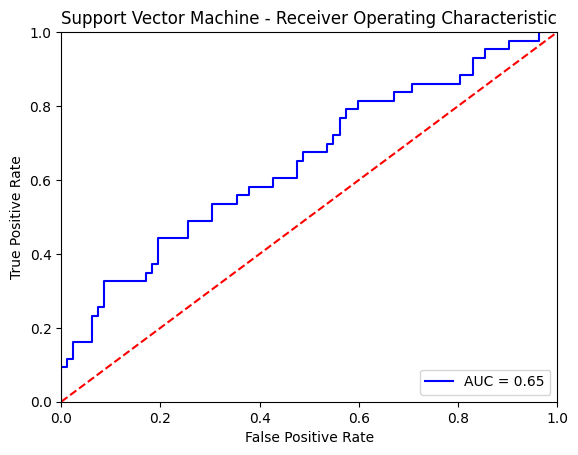

In [155]:
fpr, tpr, threshold = roc_curve(y_test,svmClsProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Support Vector Machine - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Best Models Performance Comparison**

In [156]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1,knnClsF1,decTreF1,svmClsF1],
    'Accuracy':[logRegAcc,knnClsAcc,decTreAcc,svmClsAcc],
    'Precision':[logRegPre,knnClsPre,decTrePre,svmClsPre],
    'Recall':[logRegRec,knnClsRec,decTreRec,svmClsRec],
    'AUC':[logRegAuc,knnClsAuc,decTreAuc,svmClsAuc]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

,F1,Accuracy,Precision,Recall,AUC
Model,,,,,
DecisionTree,0.438,0.560,0.370,0.395,0.549
K-NearestNeighbors,0.374,0.600,0.405,0.349,0.606
SupportVectorMachine,0.333,0.704,0.636,0.326,0.647
LogisticRegression,0.288,0.704,0.650,0.302,0.630


In [203]:
#Use the key for the classifier followed by __ and the attribute
params = {'lgr__C': [1.0, 100.0],
          'svc__C': [2,3,4],}

eclf = VotingClassifier(estimators=[ 
    ('svc', SVC(probability = True)),
    ('lgr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('DTree',DecisionTreeClassifier())
    ], voting='soft')

Voter_grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)

Voter_grid.fit(X_train,y_train)

print(Voter_grid.best_estimator_)
print (Voter_grid.best_params_)

Voter_Preds = Voter_grid.best_estimator_.predict(X_test)
Voter_Probs = Voter_grid.predict_proba(X_test)[:,1]

Voter_grid.best_score_
Voter_grid_Acc = accuracy_score(y_test,Voter_Preds)
Voter_grid_Acc
Voter_grid_Pre = precision_score(y_test,Voter_Preds,pos_label=1)
Voter_grid_Pre
Voter_grid_Rec = recall_score(y_test,Voter_Preds,pos_label=1)
Voter_grid_Rec
Voter_grid_roc = roc_auc_score(y_test,svmClsProbs)
svmClsAuc


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('svc',
                                                     SVC(probability=True)),
                                                    ('lgr',
                                                     LogisticRegression()),
                                                    ('knn',
                                                     KNeighborsClassifier()),
                                                    ('DTree',
                                                     DecisionTreeClassifier())],
                                        voting='soft'),
             param_grid={'lgr__C': [1.0, 100.0], 'svc__C': [2, 3, 4]})

VotingClassifier(estimators=[('svc', SVC(C=2, probability=True)),
                             ('lgr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('DTree', DecisionTreeClassifier())],
                 voting='soft')
{'lgr__C': 1.0, 'svc__C': 2}


0.6586666666666667

0.648

0.4857142857142857

0.3953488372093023

0.6471922858763471

**Synthetic Minority Oversampling Technique (SMOTE)** is a popular method to over-sample minority class.

SMOTE should be applied only to the training data, after it has been separated from the testing data. This prevents data leakage and provides a more reliable evaluation of your model's performance on unseen data

In [159]:
from imblearn.over_sampling import SMOTE

y.value_counts()

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
y_resampled.value_counts()

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , random_state=142, stratify=y_resampled)


buys_both
0.000    329
1.000    171
Name: count, dtype: int64

buys_both
1.000    247
0.000    247
Name: count, dtype: int64

**Logistic Regresion  GridSearch with Oversampled Train Set**

In [160]:
logRegMod_smote =logRegGrd.fit(X_resampled,y_resampled)
logRegPreds_smote = logRegMod_smote.best_estimator_.predict(X_test)

In [162]:
logRegF1_smote = logRegMod_smote.best_score_
logRegF1_smote

0.5684066443985227

In [163]:
logRegAcc_smote = accuracy_score(y_test,logRegPreds_smote)
logRegAcc

0.704

**The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.**

In [164]:
balanced_accuracy_score(y_test,logRegPreds_smote)

0.5795519001701646

**KNN Gridsearch with Oversampled Train Set**

In [169]:
KnnClsMod_smote = knnClsGrd.fit(X_resampled,y_resampled)
knnClsPreds_smote = KnnClsMod_smote.best_estimator_.predict(X_test)

In [170]:
knnClsF1_smote = KnnClsMod_smote.best_score_
knnClsF1_smote

0.6979245448501619

In [171]:
knnClsAcc_smote = accuracy_score(y_test,knnClsPreds_smote)
knnClsAcc_smote

0.6

In [172]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
knnClsAuc

0.6056437889960296

**Desition Trees Gridsearch with Oversampled Train Set**

In [177]:
decTreMod_smote = decTreGrd.fit(X_resampled,y_resampled)
decTrePreds_smote = decTreMod_smote.best_estimator_.predict(X_test)

In [178]:
decTreF1_smote =decTreMod_smote.best_score_
decTreF1_smote

0.7165993275809915

In [179]:
decTreAcc_smote = accuracy_score(y_test,decTrePreds_smote)
decTreAcc_smote

0.56

**SVM Gridsearch with Oversampled Train Set**

In [180]:
svmClsMod_smote =svmClsGrd.fit(X_resampled,y_resampled)
svmClsPreds_smote = svmClsMod_smote.best_estimator_.predict(X_test)

In [183]:
svmClsF1_smote = svmClsMod_smote.best_score_
svmClsF1_smote

0.723326539883917

In [184]:
svmClsAcc_smote = accuracy_score(y_test,svmClsPreds_smote)
svmClsAcc_smote

0.616

**Best Models Performance with oversampling Comparison**

In [186]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1_smote,knnClsF1_smote,decTreF1_smote,svmClsF1_smote],
    'Accuracy':[logRegAcc_smote,knnClsAcc_smote,decTreAcc_smote,svmClsAcc_smote]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

,F1,Accuracy
Model,,
SupportVectorMachine,0.723,0.616
DecisionTree,0.717,0.560
K-NearestNeighbors,0.698,0.600
LogisticRegression,0.568,0.608


In [ ]:
Final step  Correlation MAtrix and HeatMap

## Next Steps

**Our Target Variable (Buys_Both) is still inbalanced , but the almost 60/40 proportion still can be used for the modeling with an acceptable success rate.

** we will review if the Net_Price has any impact in the modeling, otherwise we will drop it.

** we will look for use additional modeling techniques to reduce the impact of the inbalacing

** the procuremet sequence´s impact is something that we could review as posible additional enginieered feature (Time series)

Resampling methods are rarely a good solution to the imbalance problem. It's important to understand that imbalanced data is a problem only because the minority class in the training set is not representative enough and/or the features are not good enough indicators for the label. The ideal scenario is to solve these two problems, then the model can perform perfectly well despite the imbalance.